# EDA Titanic Dataset 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
data = sns.load_dataset('titanic')

## Data Processing

In [3]:
data.shape

(891, 15)

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:>

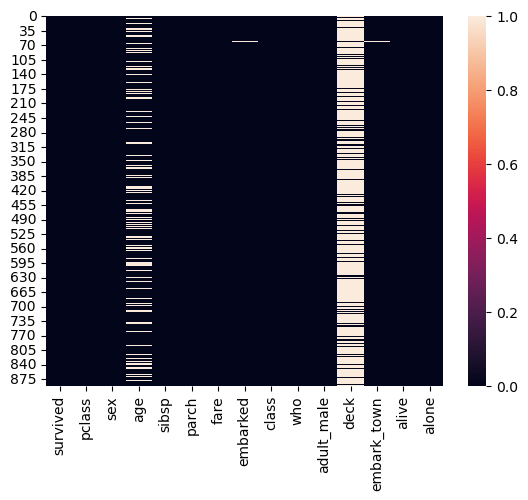

In [6]:
sns.heatmap(data=data.isna())

In [7]:
data['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

#### Columns 'age', 'embarked', 'deck' and 'embark_town' are having null values

In [11]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
data.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

#### As we can see in the heat map there are 4 columns the data having null values

In [13]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [14]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning Dataset

Treating null values

In [15]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [16]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [17]:
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

We are going to drop 'deck' column because this column is having more than 80% value null.

In [18]:
data.drop('deck',axis=1,inplace=True)

Droping duplicated rows

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(780, 14)

# Exploratory Data Analysis

# #Bivariate Analysis

# 1. How many people survived on the bases of gender.

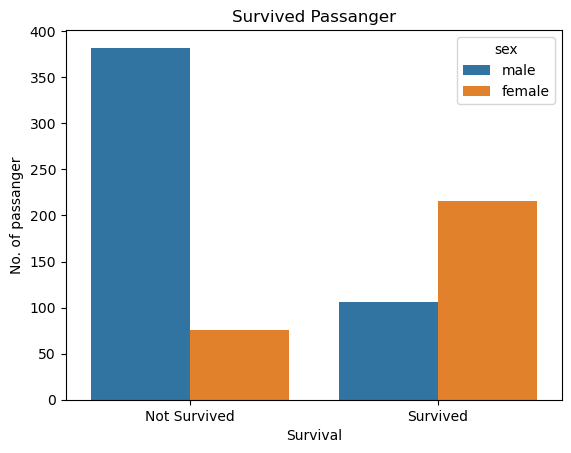

In [21]:
graph = sns.countplot(data=data,x='survived',hue='sex')
graph.set(title="Survived Passanger",xlabel='Survival',ylabel='No. of passanger')
graph.set_xticks([0,1],['Not Survived','Survived'])

### Around 375 males are not survived and around 70-75 females not suvived in the other hand we can see that in survival categories number of survived female is almost double than male. 

Text(0.5, 1.0, 'Survival Percentage')

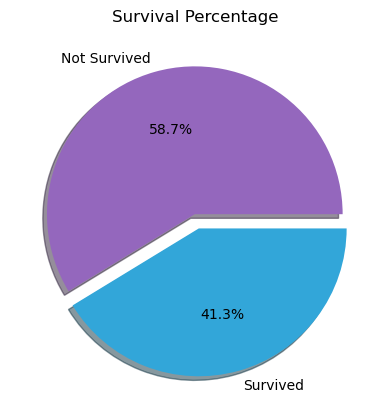

In [22]:
data['survived'].value_counts().plot(kind='pie',labels=['Not Survived','Survived'],autopct='%1.1f%%',explode=[0,.1],shadow=True,colors=['#9467bd','#32a6d9'])
plt.ylabel('')
plt.title('Survival Percentage')

### Conclution:                                                                                                                                                                      As we can see in the above graphs most of the passanger (around 60%) are not able to survive after the accident. 

# 2. Survival according to the Pclass.

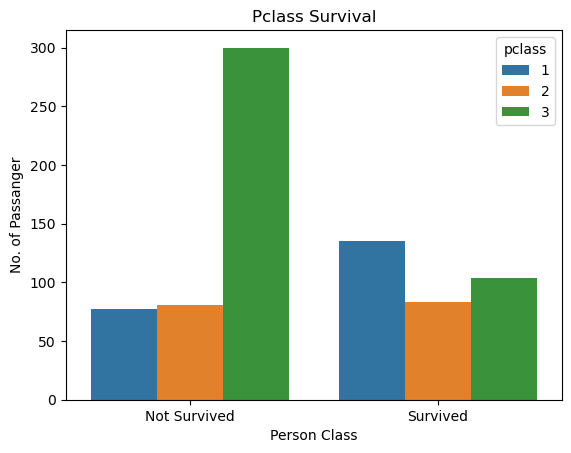

In [23]:
graph = sns.countplot(data=data,x='survived',hue='pclass')
graph.set(title='Pclass Survival',xlabel='Person Class',ylabel='No. of Passanger')
graph.set_xticks([0,1],['Not Survived','Survived'])

### Conclution: In 1st class more passanger get rescue prioroty and only half of the passanger died, but in 2nd class the ratio between survived and died is almost equal, and in 3rd class most of the passanger died and around  25% are survived. 

# 3. Maximum passanger are of what age.

C:\Users\Aaditya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'No. of passangers'),
 Text(0.5, 1.0, "Passanger's age group")]

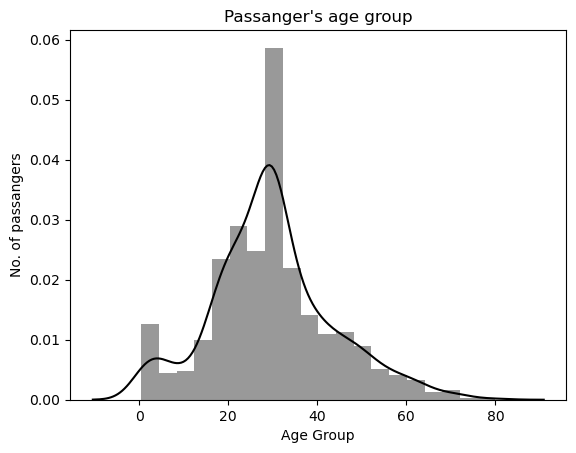

In [24]:
graph = sns.distplot(x=data['age'],bins=20,kde=True,color='black',hist=True)
graph.set(xlabel='Age Group',ylabel='No. of passangers',title='Passanger\'s age group')

### Conclution: Majority of the passangers are of age group of 20 - 40

# 4. How many peoples are with there siblings and spouse.

[Text(0.5, 1.0, 'Passanger: Siblings and Spouse'),
 Text(0.5, 0, 'No. of Siblings and Spouse'),
 Text(0, 0.5, 'Count')]

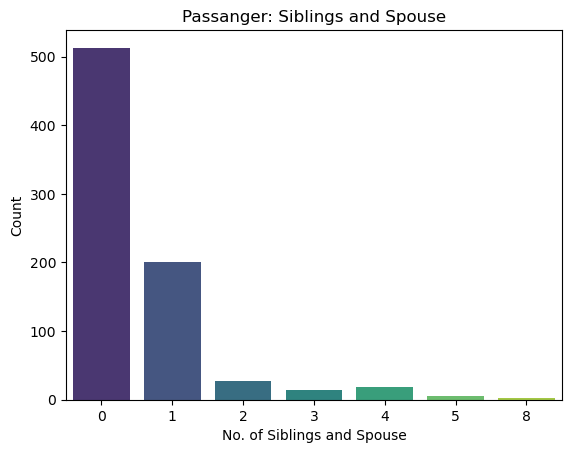

In [25]:
graph = sns.countplot(data=data,x='sibsp',palette='viridis')
graph.set(title='Passanger: Siblings and Spouse',xlabel='No. of Siblings and Spouse',ylabel='Count')

### Conclution: Around 510 panssangers have no siblings or spouse, and around 200 passangers have either one sibling or spouse and remaining passangers are having more than one siblings.

# 5. How many passangers are with their parents and child.

[Text(0.5, 1.0, 'Passanger: Parent/child'),
 Text(0.5, 0, 'No. of parent/children'),
 Text(0, 0.5, 'Count')]

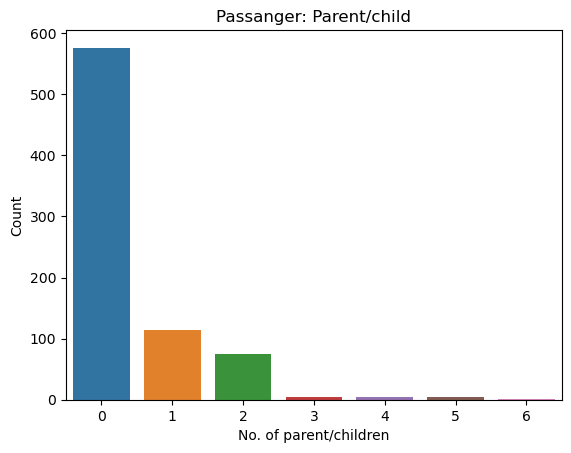

In [26]:
graph = sns.countplot(data=data,x='parch')
graph.set(title='Passanger: Parent/child',xlabel='No. of parent/children',ylabel='Count')

### Conclution: Around 75% passangers are alone on the ship, 15% are with their parent or child and rest will have  more than one parent or children.

# 6. Oldest, youngest and average age person survived.

In [27]:
data1 = data[data['survived']==1]

In [28]:
print('Oldest person Survived was of : ',data1['age'].max())
print('Youngest person Survived was of : ',data1['age'].min())
print('Average person Survived was of : ',round(data1['age'].mean(),1))

Oldest person Survived was of :  80.0
Youngest person Survived was of :  0.42
Average person Survived was of :  28.5


# #Univariate Analysis

# 7. How the passangers spent their money on tickets.

C:\Users\Aaditya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Tickets cost')]

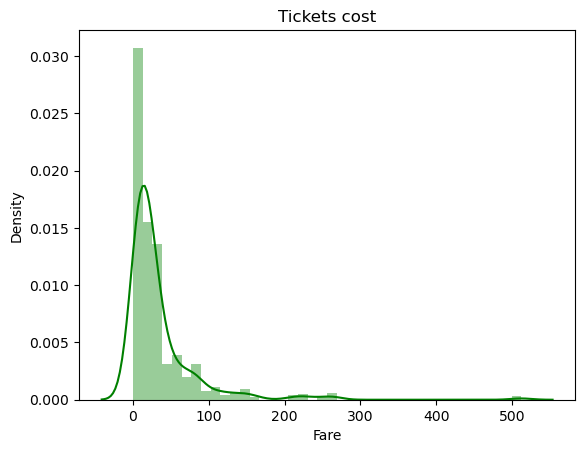

In [29]:
graph = sns.distplot(x=data['fare'],color='green',bins=40)
graph.set(xlabel='Fare',title='Tickets cost')

### Conclution: As we can see in above distribution plot maximum passangers bought lower cost tickets.

# #Feature Engineering

### Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

In [31]:
data['family'] = data['sibsp'] + data['parch']

<AxesSubplot:>

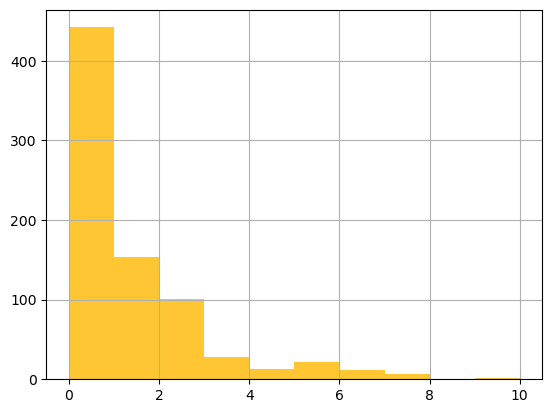

In [34]:
data['family'].hist(color='#fdc632')

### Most of the peoples are alone on the ship.